## Table of contents
* [1. Libraries Export](#chapter1)
* [2. Explanatory data analysis](#chapter2)
* [3. Data preparation](#chapter3) 
* [4. NLP models](#chapter4)
    * [4.1 Extractive summarization](#section_4_1)
    * [4.2 Abstractive summarization](#section_4_2)
* [5.Conclusion](#chapter5)

## Libraries export

In [ ]:
import sys
!{sys.executable} -m pip install torch==1.4.0
!{sys.executable} -m pip install sentencepiece
!{sys.executable} -m pip install transformers
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install summarizer
!{sys.executable} -m pip install spacy==2.0.12
!{sys.executable} -m pip install bert-extractive-summarizer
!{sys.executable} -m pip install spacy==2.0.12
!{sys.executable} -m pip install transformers==2.2.0

In [1]:
import pandas as pd
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.cluster.util import cosine_distance

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. Explanatory data analysis <a class="anchor" id="chapter1"></a>
[top](#Contents) 

With the help of WordCloud it is possible to do the simple explaratory data analysis though a visual representation of words. It will be possible to see popular words and phrases based on frequency and relevance (top 100 as an example)

In [2]:
text = """Психолог: Добрый день, меня зовут Ирина. Ольга, у нас с вами на сегодня назначена консультация. Надеюсь, что наш разговор будет приятным и полезным. Расскажите с каким запросом вы пришли на нашу первую встречу?
Ольга: Добрый день, это моя первая консультация в жизни. Я не особо понимаю что именно нужно говорить. Но у меня накопилось достаточно много всего и мне просто хотелось поговорить о том, что сейчас происходит с моей жизнью, ну много чего, конечно, как и у всех, все таки война, переезды, куча всего короче. Просто хотелось чтобы кто-то услышал, помог мне немного разобраться в себе.
Психолог: Ольга, действительно сейчас многие проживают события к которым сложно быть готовым. Давайте начнем понемногу разбираться. Расскажите о себе. Где вы сейчас находитесь, в каких условиях живете, какие события происходят вокруг вас?
Ольга: Сейчас я чувствую себя относительно в безопасности. Мы переехали из Киева на западную Украину. Здесь можно сказать, что тихо, но я не особо понимаю что происходит. Мне словно приходится начинать все с нуля. Деньги немного есть, ээээ ну там на пару месяцев хватит, но нужно искать работу. Не пойму нужно учится на новую специальность или попытаться найти работу менеджером, как раньше? Хотя кому эти менеджеры нужны, ничего толком не работает, наверно повезло людям которые сохранили работу, прям как-то радостно за них. Потерять финансовую стабильность мне реально тяжело, ждать что что-то наладится, но ничего не наладится же. Ну даже если наладится то не скоро, рада что могла себе обеспечить эту финансовую подушку. Я реально уже думала что можно и начать инвестировать но блин, реально никогда не знаешь, теперь думаю что можно было и пол года назад параллельно с подушкой все делать, но так иногда радует что хоть стабильность в деньгах есть, я все таки смогла научиться управлять немного своими финансами. Ну и новую работу искать, ну и что я тут найду? Наверно скорее всего нужно будет учить английский, вряд ли украинские компании сейчас смогут дать хорошую оплату, надо искать что-то онлайн, стабильное. Хотя какое оно стабильное, надо открывать свое дело в интернете, может делать магазин с доставкой? Да я так и не смогла этот английский выучить сколько уже ходила на курсы. Короче искать работу это мне вообще как настоящее испытание, ну и не думаю что без английского я кому-то нужна. Пока живем в бесплатном жилье, но тоже непонятно надолго это, вообще нужно ли возвращаться, в Киеве хотя бы есть дом, родные стены, ну и удобства все под рукой, но я боюсь ходить по улице вижу везде эти новости про растяжки, бомбы в молоке. Но и помощи от волонтеров больше есть и помощь с едой и вообще дома как то проще, здесь никого не знаю, но и знакомые если честно все уже разъехались и реально жизнь как с нуля. С мужем тоже сложно, постоянно приходится принимать решения, а он как будто оттягивает, но я же тоже не могу все время все делать. Короче мне реально не понятно как вообще быть, я боюсь что-то снова начинать, потому что не понятно на долго или скоро закончится. 
Психолог: Давайте выделим вопросы, которые я услышала и продолжим работу. Сейчас у вас нет основной работы для вас большой стресс искать новую, еще вы хотите вернуться в Киев, но не можете решить для себя стоит ли это сейчас делать, также вам хочется получить поддержку от мужа, но вы не можете получить той помощи на которую рассчитываете. Но самым большим испытанием для вас является то, что необходимо начать все с нуля. верно?
Ольга: Да, но даже не сам факт начала. Понимаете я уже несколько раз все теряла и начинала "жизнь с этого нуля". Поэтому мне кажется тут у меня что-то вроде иммунитета. Страх не с самой необходимости, я просто реально понимаю что если я еще раз все потеряю мне может просто не хотеться что-то делать снова. Именно когда живешь в период от нуля до "опять все хочется" тут самое страшное. Ощущение, что теряешь время, которого и так постоянно мало, и параллельно же ничего не улучшается, тебе еще наваливается сверху, и нужно разгребать все одновременно. Теряешь дом, нет людей рядом, начинаются долги, нет уверенности в своих силах, моложе не становишься, ну и вечная конкуренция потому что у людей еще есть запал, а тебе 35 и ты такой здрасьте, я хочу заявить о себе. Я начинаю постоянно думать в какой именно момент я перестала контролировать свою жизнь? Ведь мне нравилось жить в том потоке, что происходил. Мне реально часто везло, но прям про будущее я не думала. А теперь читаю про блекауты, теории заговора, считаю остаток бюджета и на сколько мне хватит денег при разных условиях жизни, думаю нужно ли пытаюсь выделить деньги на английский, мне постоянно прилетают дополнительные расходы. Ну и если реально готовится к блекауту, то нужно сделать закупку продуктов на месяц, а если мы вернемся обратно? или останемся тут? короче куда все это девать в итоге? Я смотрю на свою дырявую финансовую подушку безопасности и судорожно понимаю что кроме всего прочего просто никакого верного решения нет. 
Психолог: решение есть всегда, задайте себе вопрос: готовы ли брать ответственность за принятые решения на себя?
О: Я пытаюсь балансировать между личной ответственностью за свою собственную жизнь и умении договориться. Ну типа если бы я жила одна, мне не так сложно было бы. Не надо ждать коллективного решения, а сам тихо сделала и ни у кого не спрашиваешь.
Психолог: Расскажите подробнее, я так понимаю у вас разные точки зрения на какую то ситуацию с мужем?
О: Я реально хочу в Киев, мне там будет проще собраться с мыслями. и если бы муж помог мне и согласился бы на переезд уже было бы проще. Каждый раз с ним говорю, а он говорит ну хочешь поезжай в киев, я потом приеду. А я не хочу ехать одна, я хочу чтобы мы вдвоем поехали, потому что ну что  я там буду делать одна, мне реально надо чтобы мы или вместе были здесь или там. Короче, типа он вообще не упрощает задачу, а как будто ждет, что что-то должно случится и что-то поменяется. Но ничего же не поменяется. Я то понимаю что придется скорее всего просто жить вот так как оно есть, потому что завтра лучше не станет, и после завтра тоже. А ракета может прилететь куда угодно или не прилететь. От нас ничего не зависит. И на правительство мы влиять не можем, только свои решения принимать, ход войны поменять нереально. Но мы же семья, и мне не ясно чего мы не можем договориться о таких простых вещах, ну скажи типа нет я не хочу ехать или хочу, но через неделю. Так он мне просто говорит едь и все, а я потом что-то решу. 
Психолог:  скажите а раньше у вас возникали ситуации, когда муж оттягивал принятие решений?
Ольга: Ну он постоянно все на последний момент откладывает, но раньше не было таких критический ситуаций и я могла подождать или делать что я хотела а там уже как было, или мы ссорились ну понятно что потом он принимал решение и позже мне было уже проще я реально никого не напрягала, а там просто все случалось, при чем он всегда понимал что поздно начал шевелится, но мне было даже смешно. Я могла потом ходить и  смеяться, типа ты же знаешь что ты вечно все тянешь, вот опять такой же случай, зачем ты ждешь. Я и с другой стороны заходила типа смотри ты ждешь, а это влияет на меня. Вот я жду например, что мы купим билеты и полетим куда-то на отдых, мы все равно покупаем и летим, но цена выше на этот самолет мы поссоримся сто раз, вот объясни в чем дело, я просто хочу понять. Потому что мне жалко и нервов и денег. А можно просто было все спокойно сделать вовремя, потому что есть понимание того что вовремя все таки существует, ну или более удачное время, типа чего не пользоваться ситуацией? Я реально не могу уже я даже иногда думаю ну может просто взять и самой себе жить, а  я не хочу жить одна, мне нравиться наши отношения если бы не это. Блин я уже иногда думаю, а если бы мы не были вместе если мне не надо было бы постоянно ждать, где бы я уже была? Потому что в постоянном ожидании чуда жить тоже не легко.
 Психолог: Расскажите а как вы представляли вашу жизнь без отношений? Вот что происходит с вами, когда вам не нужно никого ждать?
Ольга: ну вот в том и дело, что иногда я понимаю что если бы я осталась одна мне было бы намного проще, но я хочу быть вместе с мужем, оберегать наше партнерство.  не хочу представлять, а если бы. ну нет никаких а если бы. Мне реально нравятся наши отношения, хотя такие штуки когда приходится ждать решения прям бесят. Просто сейчас как будто это повторение -- поехали в киев, нет давай ждать, хочешь едь. Такое впечатление что он хочет от меня избавится, типа я что напрягаю его? ну короче, когда я спрашиваю все ли в порядке, он говорит все хорошо, но я не чувствую что все хорошо. Может конечно я свои переживания на него перекладываю, но блин в стране которую постоянно раздирают на части ничего хорошего ждать уже не приходится. Пусть даже со мной происходят только хорошие вещи, ну насколько это реально, ну вот даже в плане денег, все есть, понятно накопления на пару месяцев, и работу все равно придется искать, я реально хочу просто определенности, в рамках своей реальности. Но полную определенность я чувствую только когда я сама себе хозяин. Может я просто не понимаю что такое жить с партнером.

 Психолог: Каждая семья строит свои взаимоотношения, нет единственного верного решения, как правильно. Но если я вас правильно услышала, то больше всего вас тревожит именно неопределенность в решениях внутри семьи, отсутствие возможности договорится. Расскажите какие эмоции вы испытываете от этой "неопределенности"?
Ольга: ну если честно я уже не знаю, я типа как смирилась что ли с тем, что происходит. меня эти затяжные штуки напрягают это точно, но вот так сказать что я чувствую? я просто знаю что они бывают и мне уже изначально плохо я как будто живу с бомбой с часовым механизмом и даже не предлагаю никаких идей, не хочу снова все проживать, просто нет сил, а вот эмоции я уже  не отслеживаю просто не приятно, но так описать не могу.
Психолог: Давайте начнем разбираться вместе? Как домашнее задание я хочу дать вам возможность разобраться в своих эмоциях, понять что вы чувствуете, каждый раз когда у вас будет возникать ситуация, где муж будет затягивать с решением, даже если это маленькая бытовая ситуация -- вам нужно будет записывать в дневник ситуацию и свои эмоции. Как вам такая идея?
Ольга: спасибо, реально интересно чего я вообще чувствую иногда кажется что уже ничего.
Психолог: хорошо, тогда мы определились с первым заданием и будем понемногу начинать понимать себя, спасибо за встречу."""

In [3]:
print( "Number of characters in the text before any manipulations",":", len(text))

Number of characters in the text before any manipulations : 10409


In [4]:
from wordcloud import WordCloud, STOPWORDS

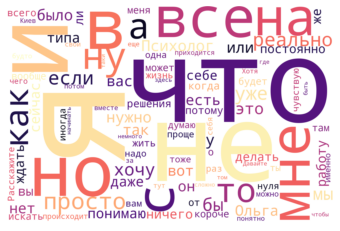

In [5]:
file_content=open("text.txt").read()
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'white',
                      width = 1800,
                      height = 1200,
                      max_words=100, 
                      collocations = False,
                      colormap = 'magma').generate(file_content)

plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis('off')
plt.show()

## 3. Data preparation <a class="anchor" id="chapter3"></a>


Preprocessing is always a crucial part when it comes to building a nlp models. In this notebook preprocessing will be in pipe line for building algorythms. Next steps of preprocessing will be used:
- Lowercasing the text
- Removing the punctuation 
- Removing the stopwords 
- Tokenizing the text
- Stemming and Lemmatization of the text 



## NLP models <a class="anchor" id="chapter4"></a>
[top](#Contents)


For my task I used 2 main text summarisation methods:

- Extractive summarization.
- Abstracttive summarization.

### Extractive summarization <a class="anchor" id="section_4_1"></a>
[top](#Contents)

The main idea of Extractive Summarization is too evaluate phrases or sentences from the text and extract only tthe most important sentences, which will build the summary. 

In [6]:
stopWords=stopwords.words("russian")
words = word_tokenize(text)
# Creating dictionary to keep the score of each word
freqTable = dict()
for word in words:
    word = word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1
# Creating dictionary to keep the score of each sentence
sentences = sent_tokenize(text)
sentenceValue = dict()
for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence]+= freq
            else:
                sentenceValue[sentence]= freq
                
                
sumValues = 0

for sentence in sentenceValue:
    sumValues += sentenceValue[ sentence]
# Average value of a sentence from the original text
average = int (sumValues / len (sentenceValue))
# Storing sentences
summary_extractive = " "
for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence]>(1.5 *average)):
        summary_extractive += " " + sentence
    

In [7]:
print( "Number of characters in the text after aplying extractive summary method",":", len(summary_extractive))

Number of characters in the text after aplying extractive summary method : 796


In [8]:
print(summary_extractive)

  Ольга: Ну он постоянно все на последний момент откладывает, но раньше не было таких критический ситуаций и я могла подождать или делать что я хотела а там уже как было, или мы ссорились ну понятно что потом он принимал решение и позже мне было уже проще я реально никого не напрягала, а там просто все случалось, при чем он всегда понимал что поздно начал шевелится, но мне было даже смешно. Я реально не могу уже я даже иногда думаю ну может просто взять и самой себе жить, а  я не хочу жить одна, мне нравиться наши отношения если бы не это. Пусть даже со мной происходят только хорошие вещи, ну насколько это реально, ну вот даже в плане денег, все есть, понятно накопления на пару месяцев, и работу все равно придется искать, я реально хочу просто определенности, в рамках своей реальности.


### Abstractive summarization <a class="anchor" id="section_4_2"></a>
[top](#Contents)


Abstractive summarization aim to generate a new summary text by rephrasing sentences The encoder outputs masked tokens while the decoder generates Gap sentences.Models that I will use for this task is Pegasus and Bert (both from Google). 

####   BERT
[top](#Contents)

Its a new Google model that is bidirectionally trained (all models before looked through text only from left to right or vica versa). (Link: https://arxiv.org/pdf/1810.04805.pdfhttps://arxiv.org/pdf/1810.04805.pdf) 

In [8]:
import torch
from summarizer import Summarizer, TransformerSummarizer

In [21]:
bert_model = Summarizer()
summary_bert = ''.join(bert_model(text, max_length=120))
print(summary_bert)

Ольга, у нас с вами на сегодня назначена консультация. Мы переехали из Киева на западную Украину. Мне словно приходится начинать все с нуля. Деньги немного есть, ээээ ну там на пару месяцев хватит, но нужно искать работу. Но самым большим испытанием для вас является то, что необходимо начать все с нуля. Понимаете я уже несколько раз все теряла и начинала "жизнь с этого нуля". Мне реально часто везло, но прям про будущее я не думала. Ну и если реально готовится к блекауту, то нужно сделать закупку продуктов на месяц, а если мы вернемся обратно? Психолог: Расскажите подробнее, я так понимаю у вас разные точки зрения на какую то ситуацию с мужем? Блин я уже иногда думаю, а если бы мы не были вместе если мне не надо было бы постоянно ждать, где бы я уже была? Психолог: Расскажите а как вы представляли вашу жизнь без отношений? Но полную определенность я чувствую только когда я сама себе хозяин. Ольга: спасибо, реально интересно чего я вообще чувствую иногда кажется что уже ничего.


In [22]:
print( "Number of characters in the text after Bert model",":", len(summary_bert))


Number of characters in the text after Bert model : 991


In [9]:
model = Summarizer()
result = model(text, ratio=0.2)  # Specified with ratio
summary_bert_2 = model(text, num_sentences=3)  # Will return 3 sentences 
print(summary_bert_2)

Ольга, у нас с вами на сегодня назначена консультация. Но и помощи от волонтеров больше есть и помощь с едой и вообще дома как то проще, здесь никого не знаю, но и знакомые если честно все уже разъехались и реально жизнь как с нуля. С мужем тоже сложно, постоянно приходится принимать решения, а он как будто оттягивает, но я же тоже не могу все время все делать.


In [11]:
print( "Number of characters in the text after Bert model(and specfying sentences)",":", len(summary_bert_2 ))

Number of characters in the text after Bert model(and specfying sentences) : 363


### XLNet
[top](#Contents)


Another algrythm that was used is XLNet(based on the same logic as Bert
, but it is believedby some schoolars to outperform Bert (link:https://arxiv.org/abs/1906.08237))

In [12]:
model = TransformerSummarizer(transformer_type="XLNet",transformer_model_key="xlnet-base-cased")
summary_xln = ''.join(model(text, min_length=60))
print(summary_xln)

Расскажите с каким запросом вы пришли на нашу первую встречу? Просто хотелось чтобы кто-то услышал, помог мне немного разобраться в себе. Потерять финансовую стабильность мне реально тяжело, ждать что что-то наладится, но ничего не наладится же. Пока живем в бесплатном жилье, но тоже непонятно надолго это, вообще нужно ли возвращаться, в Киеве хотя бы есть дом, родные стены, ну и удобства все под рукой, но я боюсь ходить по улице вижу везде эти новости про растяжки, бомбы в молоке. С мужем тоже сложно, постоянно приходится принимать решения, а он как будто оттягивает, но я же тоже не могу все время все делать. Понимаете я уже несколько раз все теряла и начинала "жизнь с этого нуля". Я начинаю постоянно думать в какой именно момент я перестала контролировать свою жизнь? Психолог: решение есть всегда, задайте себе вопрос: готовы ли брать ответственность за принятые решения на себя? И на правительство мы влиять не можем, только свои решения принимать, ход войны поменять нереально. Я и с д

In [13]:
print( "Number of characters in the text after XLNet",":", len(summary_xln))

Number of characters in the text after XLNet : 1509


## Summary <a class="anchor" id="section_5"></a>
[top](#Contents)

To achieve better results for summarization of text with both abstraction and extraction approaches. 
it really depends on the situation which approach is better as a solution, but in any case amount of possibilities and solutions for text, summarization has a variety of options. As new technologies appear every day.